In [ ]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt

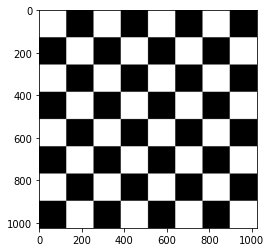

In [ ]:
# Creating a chess-board image

height=1024 # Image dimensions
width =1024

chessboard = np.zeros((height, width), dtype=np.uint8) # Initialize with zeroes (black)


for i in range(0,height):
  for j in range(0, width):
      if(((i%256 < 128 ) and (j%256 < 128)) or ((i%256 >= 128 ) and (j%256 >= 128))) :
        chessboard[i,j] = 255   # Make it white

# Show the image
fig = plt.figure() # use default display size
plt.imshow(chessboard, cmap="gray")

In [ ]:
# Define horizontal and vertical Sobel filters

filter_h = np.array([[1,2,1], [0, 0, 0], [-1,-2,-1]])  # Horizontal Sobel Filter
filter_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Vertical Sobel Filter

print("filter_h:")
print(filter_h)
print()
print("filter_v:")
print(filter_v)

filter_h:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

filter_v:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [ ]:
# Function to add zero-padding
def zero_padding(mat):
  m,n = mat.shape # matrix shape
  arr = np.zeros(n,  dtype=np.uint8) # array (initialized with 0) of size n (no. of columns) 
  arr.resize((1, 1024))
  mat = np.concatenate((arr, mat), axis = 0) # appending array at the top
  mat = np.concatenate((mat, arr), axis = 0) # appending array at the bottom
  arr = np.zeros(m+2,  dtype=np.uint8) # array (initialized with 0) of size m + 2 (no. of rows + 2) 
  arr.resize((1026,1))
  mat = np.concatenate((arr, mat), axis = 1) # appending array at the left
  mat = np.concatenate((mat, arr), axis = 1) # appedning array at the right
  return mat

In [ ]:
# define 2D convolution function
def my2Dconvolution(filter, image):

  r, c = image.shape # image shape
  r1, c1 = filter.shape # filter shape

  padded_img = zero_padding(image) # padding the image
  new_img = np.zeros(image.shape, dtype=np.uint8) # Initializing the Final image

  for i in range(1,r+1): # Traversing through each row of the image
    for j in range(1,c+1): # Traversing through each col of the image
      val = 0
      for k in range(r1): # Convolution of the image with the filter
        for l in range(c1):
          val+=padded_img[i+(k-1)][j+(l-1)]*filter[k][l]
      new_img[i-1][j-1] = abs(val) # absolute value is assigned because highly -ve value also signfies the presence of the edge
    
  return new_img

In [ ]:
new_img = my2Dconvolution(filter_h, chessboard)

Text(0.5, 1.0, 'Image convolved with horizontal Sobel filter')

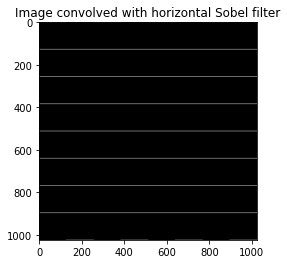

In [ ]:
fig = plt.figure() # use default display size
plt.imshow(new_img, cmap="gray")
plt.title("Image convolved with horizontal Sobel filter")

In [ ]:
new_img = my2Dconvolution(filter_v, chessboard)

Text(0.5, 1.0, 'Image convolved with vertical Sobel filter')

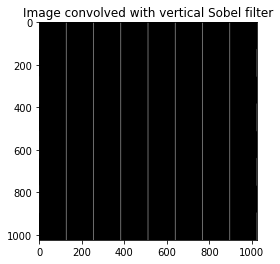

In [97]:
fig = plt.figure() # use default display size
plt.imshow(new_img, cmap="gray")
plt.title("Image convolved with vertical Sobel filter")